The gaol of this notebook is to show that there is an interesting sharing behavior of the energy eigenstates.



In [1]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

from q_solve import generate_result
from q_solve import generate_result_envi_superpo
from q_solve import generate_result_more
from Schmidt_solve import compute_schmidt_states_new
from Schmidt_solve import compute_schmidt_full
from VN import plot_VN
from VN import compute_VN_time
from e_spectrum import plot_e_spectrum
from Neff import plot_Neff_schmidt_Neff_tot
from checkup import checkup
from make_gif import make_gif_distribs1s2_new
from make_gif import make_gif_distribs1s2_new_zoomed
from make_gif import make_gif_distrib_pointer
from make_gif import make_gif_distrib_pointer_s1
from make_gif import make_gif_distrib_pointer_s2
from make_gif import make_gif_distrib_interf

from overlap import plot_p_overlap_graph
from similarities import metric_similarity_btw_s1_s2_plot


from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from PIL import Image
#from overlap import compute_schmidt_full


We start by looking directly at the object of interest, the distribution of the schmidt states in the energy eigenstates. 
We see the schmidt 2 converge to resembling Schmidt 1, with perfect convergence for the same effective interaction energy.


We also zoom in a bit to check the microscopic behavior.

In [2]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.052
# Define the time settings for the simulation
tmax= 20
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)

In [ ]:
d1, d2 = 10, 200
w = 0.41# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.05
tmax= 10
ind_nb = 100
q2=4
q1=2*(np.sqrt(w)/np.sqrt(1-w)-1)+q2*np.sqrt(w)/np.sqrt(1-w)
print(q1)
k0=round(q1)
k1=q2

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result_more(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1,k0,k1)

In [3]:

eigenenergies_total, eigenstates_total = H_total.eigenstates() 

In [4]:
make_gif_distribs1s2_new(Int_strength,w,result,eigenstates_total,eigenenergies_total,[0],d1,d2,E_spacing,tmax,ind_nb)
make_gif_distribs1s2_new_zoomed(Int_strength,w,result,eigenstates_total,eigenenergies_total,[0],d1,d2,E_spacing,tmax,ind_nb)

# Replace 'path_to_your_gif.gif' with the path to your GIF file
gif_path = f'Gifs/distrib_schmidt1_2_over_energy_spectrum_EI_{Int_strength}_w_{w}_env_NA_d1_{d1}_d2_{d2}_Espace_{E_spacing}_tmax_{tmax}_ind_nb_{ind_nb}.gif'

gif_path_zoomed =f'Gifs/zoomed_distrib_schmidt1_2_over_energy_spectrum_EI_{Int_strength}_w_{w}_env_NA_d1_{d1}_d2_{d2}_Espace_{E_spacing}_tmax_{tmax}_ind_nb_{ind_nb}.gif'

# Create HTML code to display the GIF
html_code = f'<img src="{gif_path}">'
# Display the GIF
display(HTML(html_code))
# Create HTML code to display the GIF
html_code_z = f'<img src="{gif_path_zoomed}">'
# Display the GIF
display(HTML(html_code_z))


[0]


Looking at the zoomed version, we see that the inital state has orange and blue with nonzero for some of the same 

We try to verify this apparent suppression they seem to undergo when they share a nonzero value in an eigenstate.

For this we look at some relevant metrics

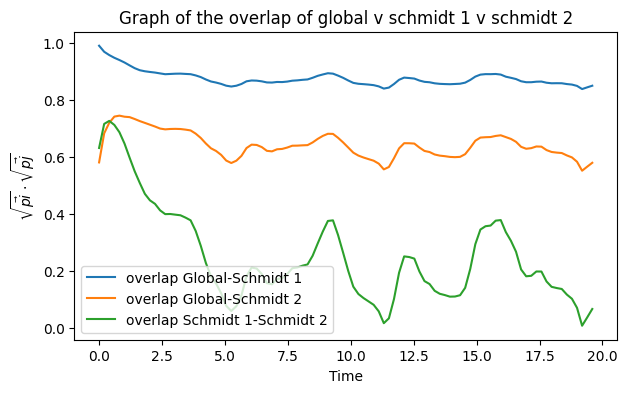

In [29]:
plot_p_overlap_graph(tlist,result,H_total,w,Int_strength,False)


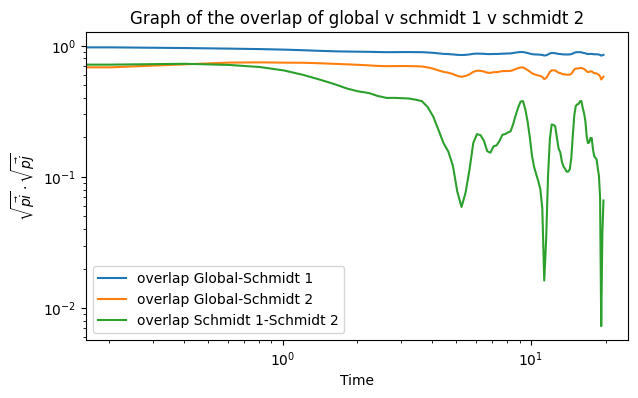

In [30]:
plot_p_overlap_graph(tlist,result,H_total,w,Int_strength,True)


In [ ]:
def metric_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist):
